Q.1. Data source-UCI adult dataset, also called as Census Income

Link-UCI Machine Learning Repository: Adult Data Set

Question-Predict whether income exceeds 550K/yr based on census

1. Shape of database


In [57]:
import pandas as pd
data=pd.read_csv("adult.csv")
print(data)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [58]:
shape=data.shape
print(shape)

(32561, 15)


2. Print column names

In [59]:
columns = list(data.columns)
print(columns)

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


3. How many men and women (sex feature) are represented in this dataset.


In [60]:
gender_counts = data["sex"].value_counts()
print("The number of men and women represented in the dataset are: ",gender_counts)


The number of men and women represented in the dataset are:  sex
Male      21790
Female    10771
Name: count, dtype: int64


4. What is the average age (age feature) of women?


In [61]:
female_data = data[data["sex"] == "Female"]
average_age_women = female_data["age"].mean()
print("The average age of women:", average_age_women)

The average age of women: 36.85823043357163


5. What is the percentage of German citizens (native-country feature)?


In [62]:
german_citizens = data["native.country"].eq("Germany").sum()
total_entries = len(data)
german_percentage = (german_citizens / total_entries) * 100
print("The percentage of German Citizens:", german_percentage)

The percentage of German Citizens: 0.42074874850281013


6. What are the mean and standard deviation of age for those who earn more than 50% per year (salary feature) and those who earn less than 50K per year?


In [63]:
earning_more_50k = data[data["income"] == ">50K"]
stats_earning_more_50k = earning_more_50k["age"].agg(["mean", "std"])

earning_less_50k = data[data["income"] == "<=50K"]
stats_earning_less_50k = earning_less_50k["age"].agg(["mean", "std"])

print("Those earning more than 50k: \n", stats_earning_more_50k)
print("\nThose earning less than 50k: \n", stats_earning_less_50k)


Those earning more than 50k: 
 mean    44.249841
std     10.519028
Name: age, dtype: float64

Those earning less than 50k: 
 mean    36.783738
std     14.020088
Name: age, dtype: float64


7. Is it true that people who earn more than 50K have at least high school education? (education-Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)


In [64]:
high_earning_education = data[data["income"] == ">50K"]["education"]
high_school_levels = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

all_have_high_school = high_earning_education.isin(high_school_levels).all()

print("All high earners have at least high school education:", all_have_high_school)


All high earners have at least high school education: False


8. Display age statistics for each race (race feature) and each gender (sex feature) Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.


In [65]:
# Calculate age statistics by race and gender
age_stats = data.groupby(["race", "sex"])["age"].describe()

# Find the maximum age of Amer-Indian-Eskimo men
amer_indian_eskimo_men = data[(data["race"] == "Amer-Indian-Eskimo") & (data["sex"] == "Male")]
max_age_amer_indian_eskimo_men = amer_indian_eskimo_men["age"].max()

# Print the results
print("Age stats by race and gender: \n", age_stats)
print("\nMax age of Amer-Indian-Eskimo men:", max_age_amer_indian_eskimo_men)


Age stats by race and gender: 
                              count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75

9. Among whom is the proportion of those who earn a lot (>50K) greater, married or single men (marital-status feature)?Consider as married those who have a (marital-status feature) ? Consider as married those who have a marital-status status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.


In [66]:
# Group people as 'Married' or 'Single'
marital_status_group = []
for status in data["marital.status"]:
    if "Married" in status:
        marital_status_group.append("Married")
    else:
        marital_status_group.append("Single")
data["marital_status_group"] = marital_status_group

# Find all married and single men
married_men = data[(data["sex"] == "Male") & (data["marital_status_group"] == "Married")]
single_men = data[(data["sex"] == "Male") & (data["marital_status_group"] == "Single")]

# Calculate high earners for married men
if len(married_men) > 0:
    married_high_earners = len(married_men[married_men["income"] == ">50K"]) / len(married_men)
else:
    married_high_earners = 0

# Calculate high earners for single men
if len(single_men) > 0:
    single_high_earners = len(single_men[single_men["income"] == ">50K"]) / len(single_men)
else:
    single_high_earners = 0

# Print results
print("Proportion of high earners (married men):", married_high_earners)
print("Proportion of high earners (single men):", single_high_earners)

Proportion of high earners (married men): 0.4405139945351156
Proportion of high earners (single men): 0.08449509031397745


10. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [67]:
# Find the maximum number of hours a person works per week
max_hours = data["hours.per.week"].max()

# Filter the data for people who work the maximum number of hours
people_working_max_hours = data[data["hours.per.week"] == max_hours]

# Count the number of people working the maximum hours
num_people_max_hours = len(people_working_max_hours)

# Calculate the percentage of high earners (>50K) among them
if num_people_max_hours > 0:
    high_earners_max_hours = (len(people_working_max_hours[people_working_max_hours["income"] == ">50K"])/ num_people_max_hours) * 100
else:
    high_earners_max_hours = 0

# Print the results
print("Max hours per week:", max_hours)
print("Number of people working max hours:", num_people_max_hours)
print("Percentage of high earners among them:", high_earners_max_hours)



Max hours per week: 99
Number of people working max hours: 85
Percentage of high earners among them: 29.411764705882355


Q.2. Dataset : College Placement Data 

Solve the following: 

1. Read the csv file and display first 10 records. 

In [68]:
import pandas as pd
data=pd.read_csv("placement-dataset.csv")
data.head(10)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
5,Chicago,7.1,48.0,1
6,New York,5.7,NaN,0
7,Los Angeles,5.0,63.0,0
8,Chicago,6.1,156.0,0
9,New York,5.1,66.0,0


2. Display all columns in it. 

In [69]:
data.columns

Index(['city', 'cgpa', 'iq', 'placement'], dtype='object')

3. Perform statistical analysis on it.

In [70]:
data.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


4. Check for the missing and duplicated values. 

In [71]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicated rows
duplicated_rows = data.duplicated().sum()

# Print results
print("Missing values in each column:")
print(missing_values)
print("\nNumber of duplicated rows:", duplicated_rows)

Missing values in each column:
city         0
cgpa         8
iq           4
placement    0
dtype: int64

Number of duplicated rows: 1


5. Display average CGPA by city. 

In [72]:
# Calculate the average CGPA for each city
average_cgpa_by_city = data.groupby("city")["cgpa"].mean()

# Print the results
print("Average CGPA by city:")
print(average_cgpa_by_city)


Average CGPA by city:
city
Chicago        6.017241
Los Angeles    5.793333
New York       6.075758
Name: cgpa, dtype: float64


6. Display placement by city.

In [73]:
# Count placements for each city
placement_by_city = data.groupby("city")["placement"].sum()

# Print the results
print("Placement by city:")
print(placement_by_city)


Placement by city:
city
Chicago        15
Los Angeles    13
New York       18
Name: placement, dtype: int64


7. Display name of the city having highest CGPA

In [74]:
# Find the maximum CGPA
max_cgpa = data["cgpa"].max()

# Filter the rows where CGPA equals the maximum CGPA
city_with_max_cgpa = data[data["cgpa"] == max_cgpa]

# Get the city name from the filtered rows
highest_cgpa_city = city_with_max_cgpa["city"].iloc[0]

# Print the result
print("City with the highest CGPA:", highest_cgpa_city)

City with the highest CGPA: New York


8. Display the name of cities whose placement is 1

In [75]:
# Filter rows where placement is 1
placed_cities = data[data["placement"] == 1]

# Get the unique city names from the filtered rows
unique_cities = placed_cities["city"].unique()

# Print the result
print("Cities with placement 1:", unique_cities)


Cities with placement 1: ['New York' 'Chicago' 'Los Angeles']


Q.3. Dataset: Student performance dataset 

Solve the following: 

1. Create a dictionary with the following details and convert it into 
dataframe. 
"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'], 
“evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'], 
"type": ['grass', 'fire', 'water', 'bug'], 
"hp": [45, 39, 44, 45], 
“pokedex": ['yes', 'no','yes','no']

In [76]:
import pandas as pd

# Create a dictionary with the given details
pokemon_data = {
    "name": ['Bulbasaur', 'Charmander', 'Squirtle', 'Caterpie'],
    "evolution": ['Ivysaur', 'Charmeleon', 'Wartortle', 'Metapod'],
    "type": ['grass', 'fire', 'water', 'bug'],
    "hp": [45, 39, 44, 45],
    "pokedex": ['yes', 'no', 'yes', 'no']
}

# Convert the dictionary into a DataFrame
pokemon_df = pd.DataFrame(pokemon_data)

# Print the DataFrame
print(pokemon_df)


         name   evolution   type  hp pokedex
0   Bulbasaur     Ivysaur  grass  45     yes
1  Charmander  Charmeleon   fire  39      no
2    Squirtle   Wartortle  water  44     yes
3    Caterpie     Metapod    bug  45      no


2. If the DataFrame columns are in alphabetical order, change the order of 
the columns as name, type, hp, evolution, pokedex 

In [77]:
# Reorder the DataFrame columns
pokemon_df = pokemon_df[["name", "type", "hp", "evolution", "pokedex"]]

# Print the updated DataFrame
print(pokemon_df)


         name   type  hp   evolution pokedex
0   Bulbasaur  grass  45     Ivysaur     yes
1  Charmander   fire  39  Charmeleon      no
2    Squirtle  water  44   Wartortle     yes
3    Caterpie    bug  45     Metapod      no


3. Add another column called place, and insert places (lakes, parks, hills, 
forest etc) of your choice

In [78]:
# Add a new column called 'place' with custom values
pokemon_df["place"] = ["forest", "hills", "lakes", "parks"]

# Print the updated DataFrame
print(pokemon_df)


         name   type  hp   evolution pokedex   place
0   Bulbasaur  grass  45     Ivysaur     yes  forest
1  Charmander   fire  39  Charmeleon      no   hills
2    Squirtle  water  44   Wartortle     yes   lakes
3    Caterpie    bug  45     Metapod      no   parks


4. Display all columns and their datatypes.

In [79]:
# Display all columns and their data types
print(pokemon_df.dtypes)


name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object


5. Display all the names whose pokedex status is “yes” 


In [80]:
# Filter rows where pokedex is "yes"
names_with_pokedex_yes = pokemon_df[pokemon_df["pokedex"] == "yes"]["name"]

# Print the result
print("Names with pokedex status 'yes':")
print(names_with_pokedex_yes)

Names with pokedex status 'yes':
0    Bulbasaur
2     Squirtle
Name: name, dtype: object


6. Display all names whose hp is in between 40 to 45 and type will be either 
fire or water 

In [81]:
# Filter rows based on hp and type conditions
filtered_names = pokemon_df[(pokemon_df["hp"].between(40, 45)) & 
                            (pokemon_df["type"].isin(["fire", "water"]))]["name"]

# Print the result
print("Names with hp between 40 to 45 and type as fire or water:")
print(filtered_names)

Names with hp between 40 to 45 and type as fire or water:
2    Squirtle
Name: name, dtype: object


7. Convert the column pokedex into 1’s and 0’s.

In [82]:
# Convert the 'pokedex' column to 1's and 0's
pokemon_df["pokedex"] = pokemon_df["pokedex"].map({"yes": 1, "no": 0})

# Print the updated DataFrame
print(pokemon_df)


         name   type  hp   evolution  pokedex   place
0   Bulbasaur  grass  45     Ivysaur        1  forest
1  Charmander   fire  39  Charmeleon        0   hills
2    Squirtle  water  44   Wartortle        1   lakes
3    Caterpie    bug  45     Metapod        0   parks


Q.4. Dataset: Online food order prediction 

1) Who orders food more ? Married or single( Make use of pie chart ) 

In [83]:
import pandas as pd
data=pd.read_csv("onlinefoods.csv")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


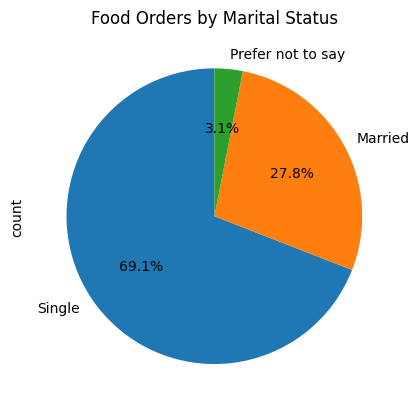

In [84]:
import matplotlib.pyplot as plt

# Count food orders based on marital status
order_counts = data["Marital Status"].value_counts()

# Plot the pie chart
order_counts.plot.pie(autopct='%1.1f%%', labels=order_counts.index, startangle=90)

# Add title
plt.title("Food Orders by Marital Status")
plt.show()

Food orders by Marital Status-- In this graph, single people orders more food than the married ones.

2. Analyze food ordering behavior across Income Levels. ( Make use of 
pie chart )

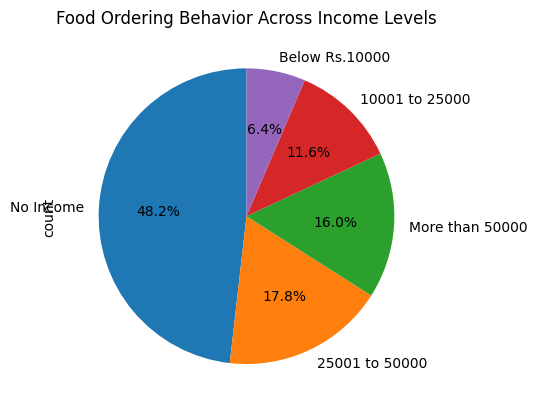

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Count food orders based on income levels
income_counts = data["Monthly Income"].value_counts()

# Plot the pie chart
income_counts.plot.pie(
    autopct='%1.1f%%', 
    labels=income_counts.index, 
    startangle=90
)

# Add title
plt.title("Food Ordering Behavior Across Income Levels")
plt.show()

Food ordering behavior across income levels - people are ordering food those whoever has no income

3. Display Food ordering patterns based on family size. ( Make use of pie 
chart ) 

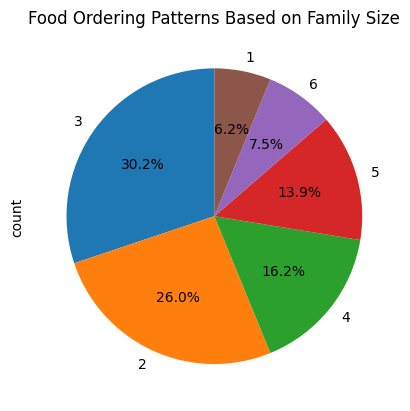

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Count food orders based on family size
family_size_counts = data["Family size"].value_counts()

# Plot the pie chart
family_size_counts.plot.pie(
    autopct='%1.1f%%', 
    labels=family_size_counts.index, 
    startangle=90
)

# Add title
plt.title("Food Ordering Patterns Based on Family Size")
plt.show()

Family size with 2 or 3 ordering the more food.

4. Display the count of customers based on qualification, who orders 
online food.(Make use of bar chart) 

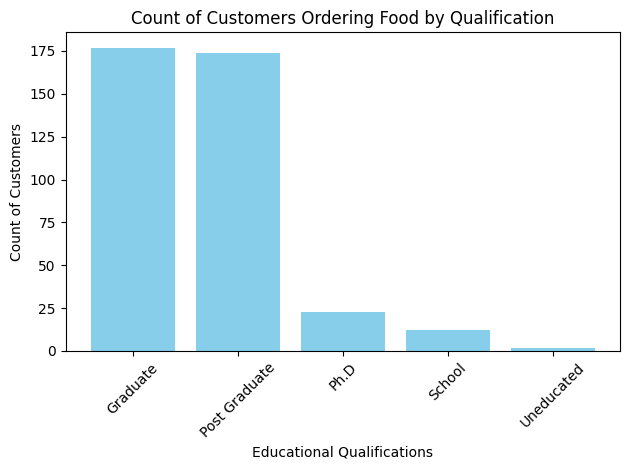

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Count customers based on educational qualifications
qualification_counts = data["Educational Qualifications"].value_counts()

# Plot the bar chart
plt.bar(qualification_counts.index, qualification_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("Educational Qualifications")
plt.ylabel("Count of Customers")
plt.title("Count of Customers Ordering Food by Qualification")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Graduate and Post Graduate people are ordering more food.


5. Count total number of Positive feedback and Negative feedback also 
visualize it.

Feedback Counts:
Feedback
Positive     317
Negative      71
Name: count, dtype: int64


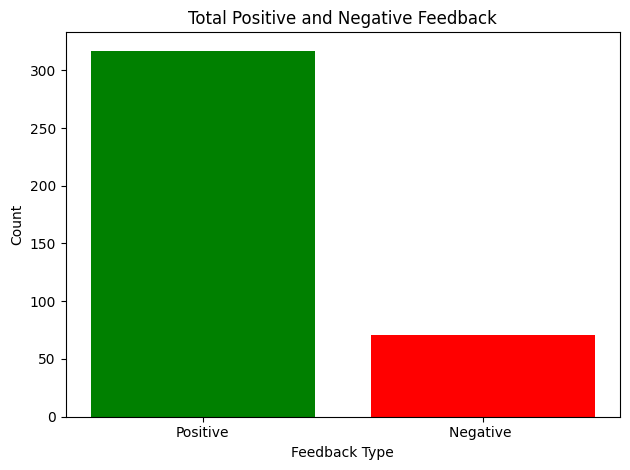

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Count feedback types
feedback_counts = data["Feedback"].value_counts()

# Print the counts
print("Feedback Counts:")
print(feedback_counts)

# Visualize with a bar chart
plt.bar(feedback_counts.index, feedback_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel("Feedback Type")
plt.ylabel("Count")
plt.title("Total Positive and Negative Feedback")
plt.tight_layout()

# Show the plot
plt.show()

There are more positive feedback than the negative ones.